## Customer Churn Detection

* `Importing Libraries`

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


* `Read data`

In [51]:
FILEPATH = os.path.join(os.getcwd(), "dataset.csv")
df = pd.read_csv(FILEPATH)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [52]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [53]:
df.shape

(10000, 14)

In [54]:
# drop unusful features
df.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace=True)

In [55]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [56]:
# show statistics of the numeric data
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [57]:
# show statistics of the categorical data
df.describe(include="object")

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


* `Exploratory data analysis`

In [58]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [59]:
# Apply some feature engineering
df["withdrawing"] = abs(df["EstimatedSalary"] - df["Balance"])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,withdrawing
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,28734.72
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,45729.23
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,46426.72


In [60]:
df["Geography"].value_counts(normalize=True)

Geography
France     0.5014
Germany    0.2509
Spain      0.2477
Name: proportion, dtype: float64

In [61]:
df["Gender"].value_counts(normalize=True)

Gender
Male      0.5457
Female    0.4543
Name: proportion, dtype: float64

In [62]:
df["Exited"].value_counts(normalize=True)

Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64

---

### `Data Viz & Data Handling`

* `Univariate Viz`

In [63]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
withdrawing        float64
dtype: object

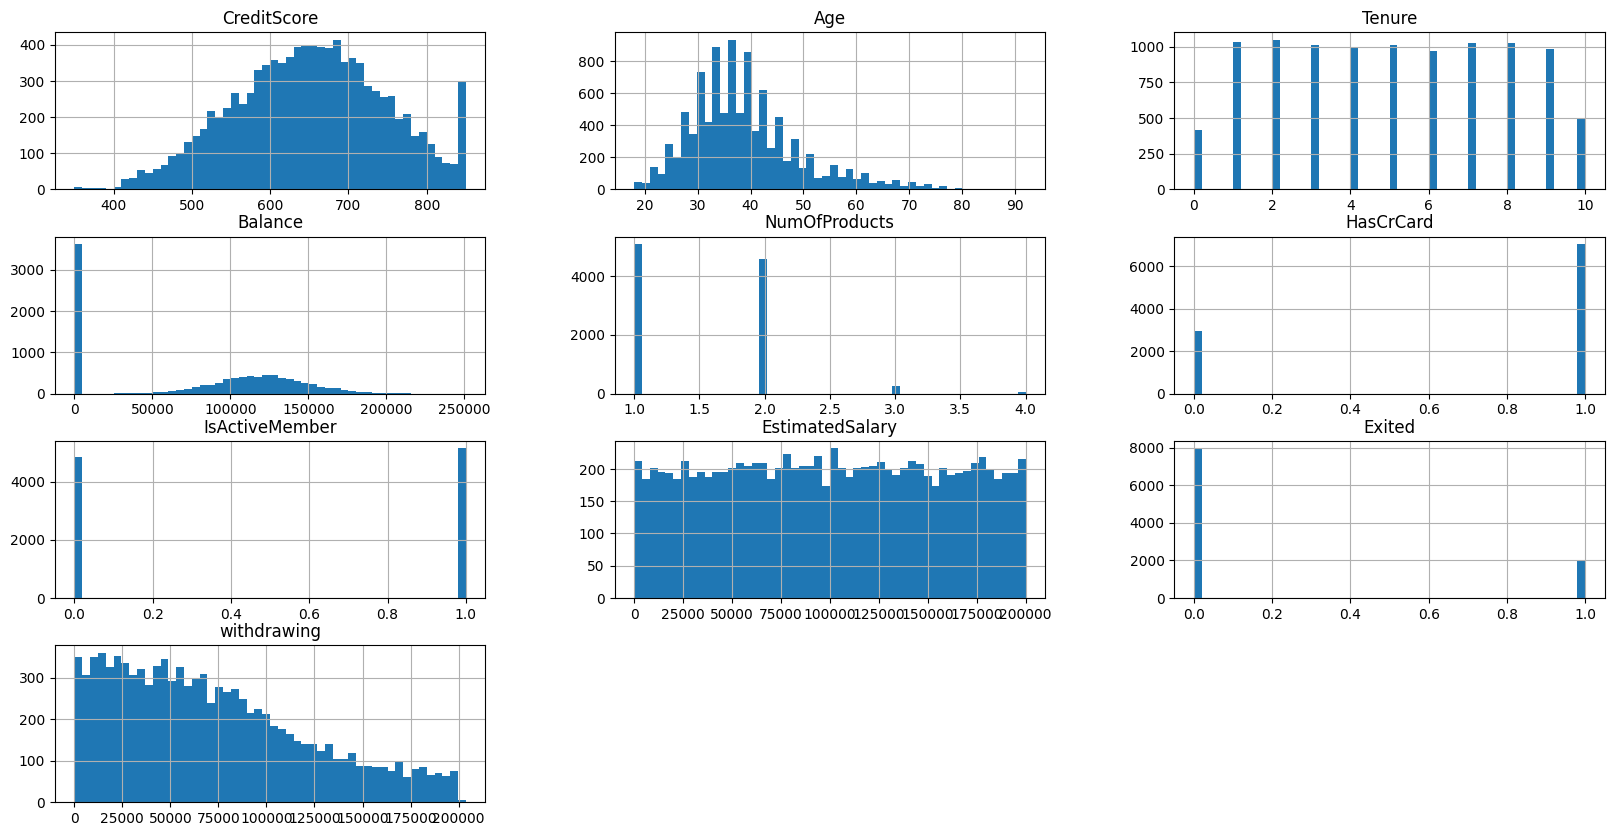

In [64]:
df.hist(bins=50, figsize=(20, 10))
plt.show()

In [65]:
# Handle Outliers
df.drop(index=df[df["Age"] > 80].index.tolist(), axis=0, inplace=True)

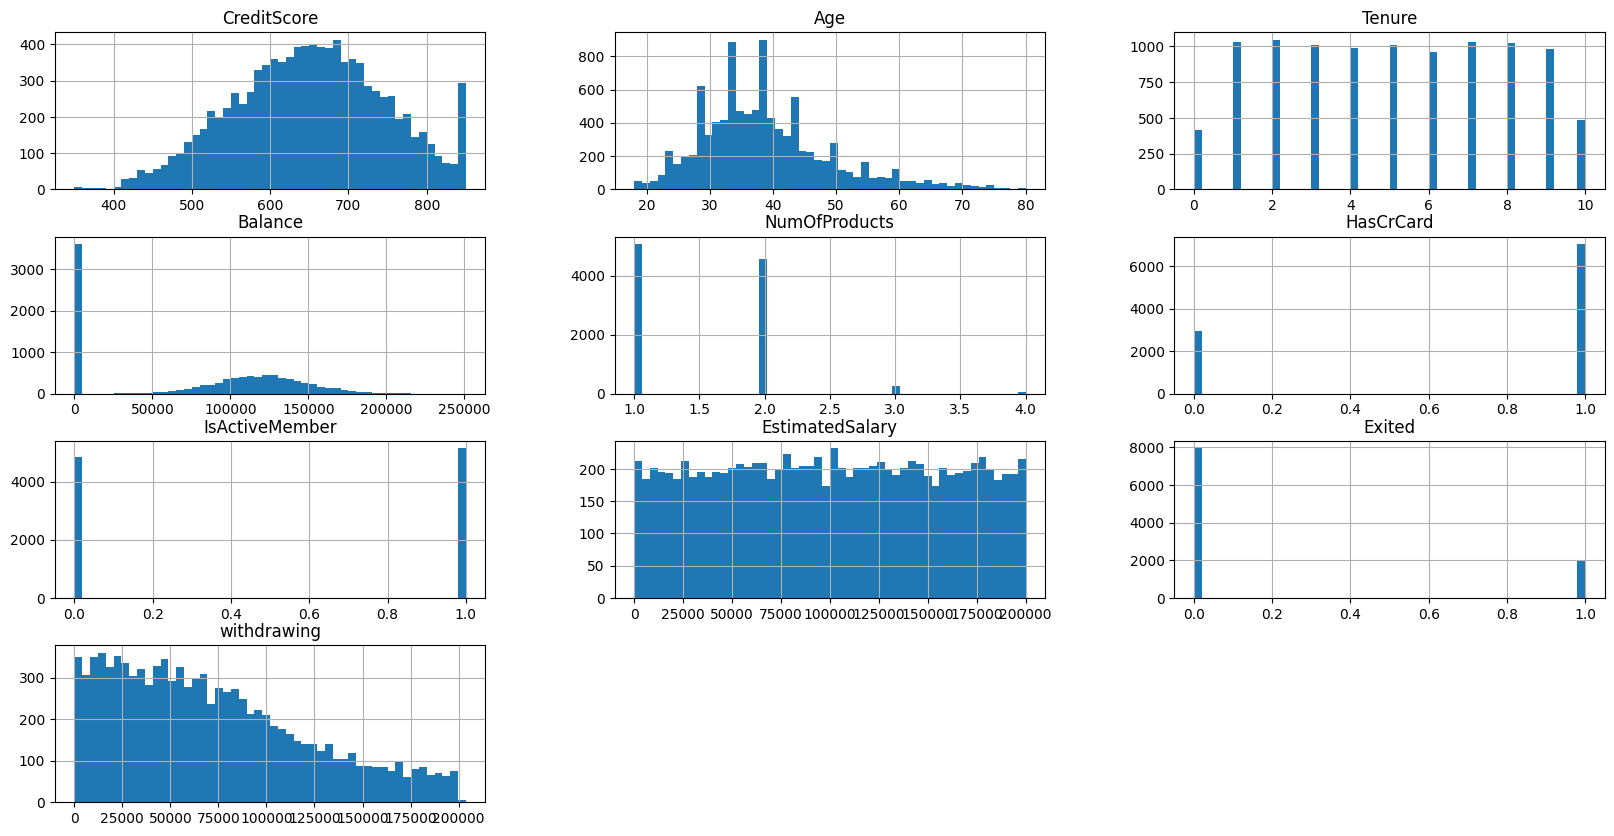

In [66]:
# Histograms after handling age coloumn
df.hist(bins=50, figsize=(20, 10)) 
plt.show()

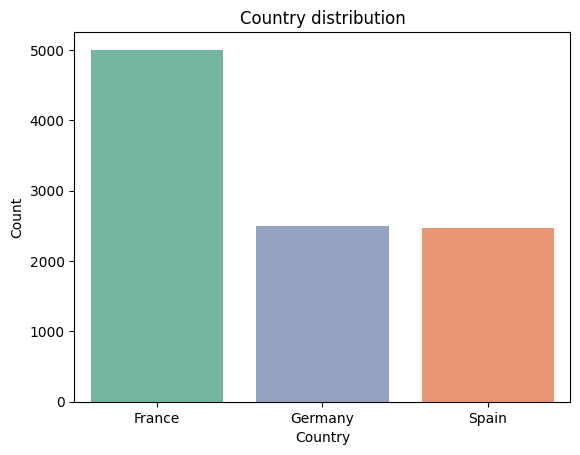

In [71]:
# Countplot for Geography Column
sns.countplot(df, x="Geography", order=df["Geography"].value_counts().index.tolist(), palette="Set2", legend=False, hue="Geography")

plt.title("Country distribution")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

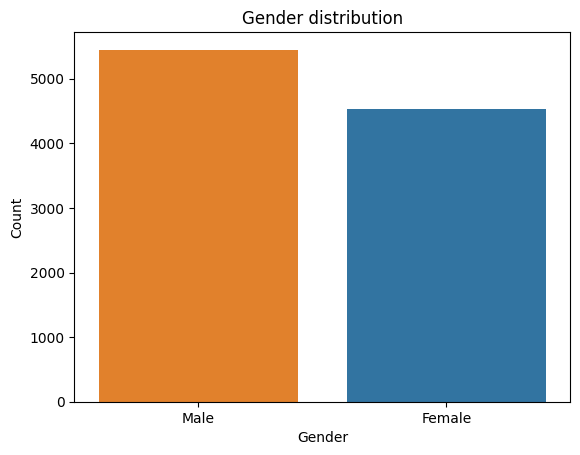

In [73]:
# Countplot for Gender Column
sns.countplot(df, x="Gender", order=df["Gender"].value_counts().index.tolist(), legend=False, hue="Gender")

plt.title("Gender distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

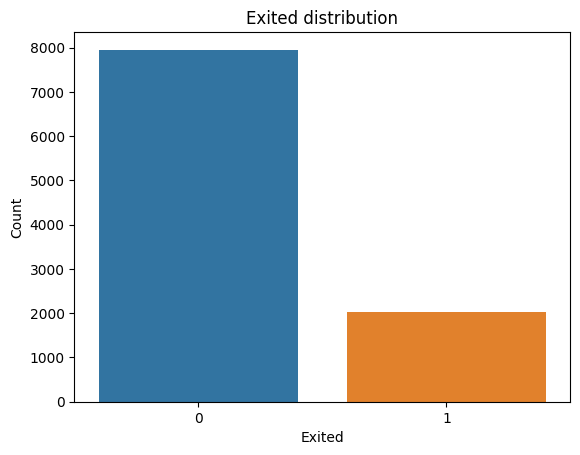

In [74]:
# Countplot for Exited target
sns.countplot(df, x="Exited", order=df["Exited"].value_counts().index.tolist(), legend=False, hue="Exited")

plt.title("Exited distribution")
plt.xlabel("Exited")
plt.ylabel("Count")
plt.show()

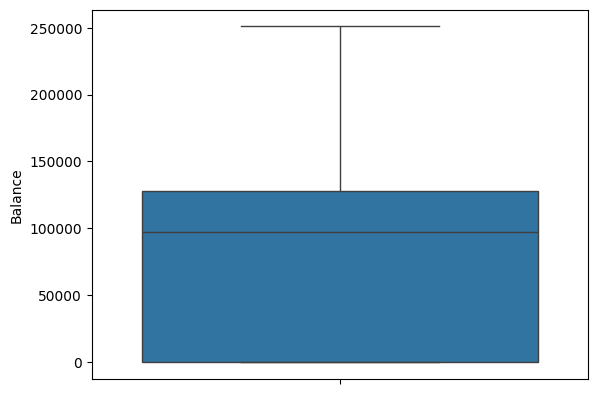

In [77]:
sns.boxplot(df, y=df["Balance"])
plt.show()

* `Bivariante Viz`

In [78]:
# Average Salary per Gender
df[["Gender", 'EstimatedSalary']].groupby("Gender")["EstimatedSalary"].mean()

Gender
Female    100575.998277
Male       99671.901194
Name: EstimatedSalary, dtype: float64

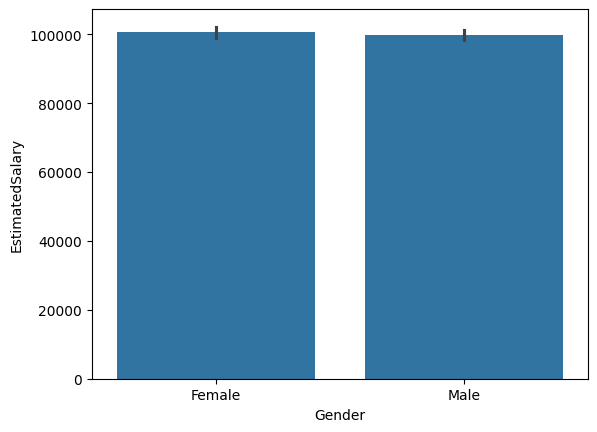

In [80]:
# Average Salary per Gender using barplot
sns.barplot(df, x="Gender", y="EstimatedSalary", estimator='mean')
plt.show()

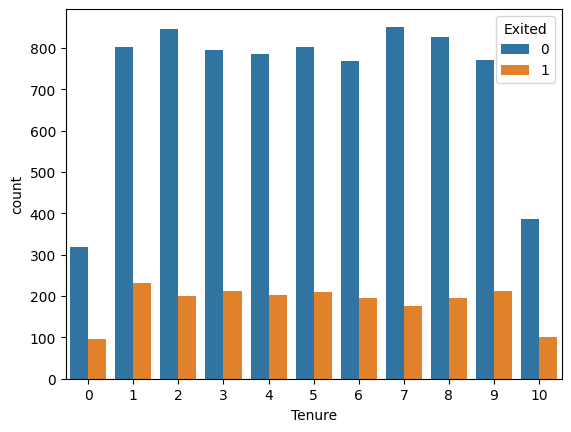

In [81]:
# Realation between Tenure and Exited
sns.countplot(data=df, x='Tenure', hue='Exited')
plt.show()

In [86]:
df[["Geography", 'Exited']].groupby("Geography")["Exited"].sum()

Geography
France     809
Germany    814
Spain      413
Name: Exited, dtype: int64

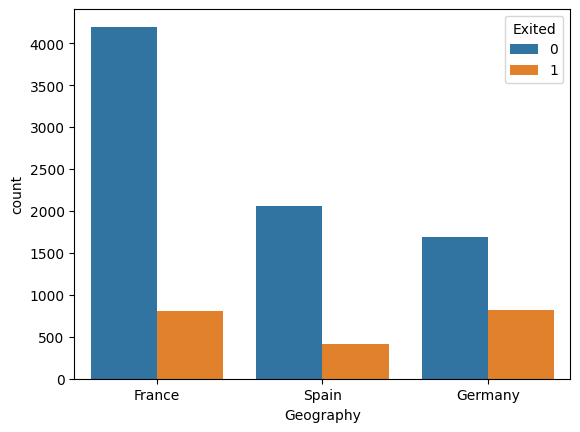

In [82]:
# Relation between Geography and exited customers
sns.countplot(df, x="Geography", hue="Exited")
plt.show()

---

* `Splitting dataset into train & test`

In [97]:
X = df.drop(columns="Exited", axis=1)
y = df["Exited"]

y.value_counts(normalize=True)

Exited
0    0.796155
1    0.203845
Name: proportion, dtype: float64

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42, stratify=y)

## Train data stratified on y
# train data = 0.8 * 0.796155 * 9988 + 0.8 * 0.203845 * 9988
print('X_train.shape \t', X_train.shape)
print('y_train.shape \t', y_train.shape)
print(0.8 * 0.796155 * 9988 + 0.8 * 0.203845 * 9988)
print('***'*10)
## Test data stratified on y
# test data = 0.2 * 0.796155 * 9988 + 0.2 * 0.203845 * 9988
print('X_test.shape \t', X_test.shape)
print('y_test.shape \t', y_test.shape)
print(0.2 * 0.796155 * 9988 + 0.2 * 0.203845 * 9988)

X_train.shape 	 (7990, 11)
y_train.shape 	 (7990,)
7990.400000000001
******************************
X_test.shape 	 (1998, 11)
y_test.shape 	 (1998,)
1997.6000000000001


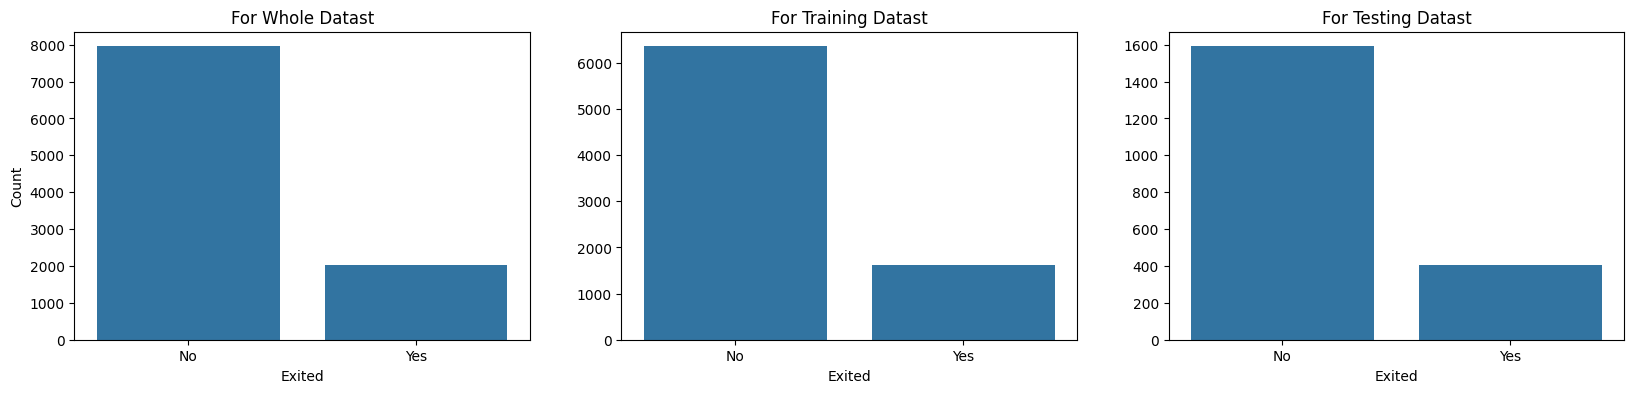

In [99]:
## plottting to check
fig, ax = plt.subplots(1, 3, figsize=(20, 4))

## Whole dataset
plt.sca(ax[0])
sns.countplot(x=y)
plt.title('For Whole Datast')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

## train
plt.sca(ax[1])
sns.countplot(x=y_train)
plt.title('For Training Datast')
plt.ylabel('')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

## test
plt.sca(ax[2])
sns.countplot(x=y_test)
plt.title('For Testing Datast')
plt.ylabel('')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

---